**Autores:**

Bolívar Alvarez Muñoz

Carlos Rosero Cumbillo

Ricardo Aimacaña Gualpa

Edwin Chacón Cajamarca

**Maestría:**

Sistemas de información, mención Inteligencia de Negocios y Analítica de Datos Masivos

**Proyecto:**

ANÁLISIS PREDICTIVO DE VENTAS BASADO EN MODELOS DE MACHINE LEARNING PARA EL NEGOCIO  AVÍCOLA

In [ ]:
!pip install pandas xlrd
!pip install matplotlib
!pip install tensorflow keras

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Métricas
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

#regrseión lineal
from sklearn.linear_model import LinearRegression

#randomforest
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

#Red Neuronal 1
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models, regularizers

#red Neuronal 2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


IMPORTACIÓN DEL DATASET

Se importa el dataset de 2022 y 2023 para unirlos y tener un framework de entrenamiento y análisis  

Se importa un dataset del primer semestre del 2024 para tenerlo como control y test de nuestros modelos

In [ ]:
df_2022 = pd.read_excel('/content/vtas_facturacion_2022.xls')
df_2023 = pd.read_excel('/content/vtas_facturacion_2023.xls')
df_2024 = pd.read_excel('/content/vtas_facturacion_S1_2024.xls')

frames = [df_2022, df_2023]
df_join = pd.concat(frames)
print(df_join.head())

num_filas = len(df_join)
print(f"Número total de filas 1: {num_filas}")


                               Estadística De Ventas    Unnamed: 1  \
0  Agrupada por: "Org. Comercial" - "Cliente" - "...           NaN   
1                                                NaN           NaN   
2                                                NaN           NaN   
3                        Cód. Organización Comercial  Cód. Cliente   
4                                                 01         00248   

      Unnamed: 2    Unnamed: 3 Unnamed: 4    Unnamed: 5        Unnamed: 6  \
0            NaN           NaN        NaN           NaN               NaN   
1            NaN           NaN        NaN           NaN               NaN   
2            NaN           NaN        NaN           NaN               NaN   
3  Cód. Artículo  Cód. Familia    Familia  Cód. Factura           Factura   
4         001453        030103  GANADERIA      Factura:  01/2022/K25/1166   

       Unnamed: 7           Unnamed: 8       Unnamed: 9  \
0             NaN                  NaN              NaN  

LIMPIEZA DE DATOS

Se procede a definir nombres de las columnas eliminar filas sin valores numéricos, eliminar columnas que no aporten al análisis de la data y eliminar los valores negativos correspondientes a proformas del sistema

In [ ]:
df_join.columns = df_join.iloc[3].values.tolist()
print(df_join.columns)

df_2024.columns = df_2024.iloc[3].values.tolist()
print(df_2024.columns)
# df = df.iloc[4:]

Index(['Cód. Organización Comercial', 'Cód. Cliente', 'Cód. Artículo',
       'Cód. Familia', 'Familia', 'Cód. Factura', 'Factura', 'Cód. F.Factura',
       'F.Factura', 'Cód. Forma pago', 'Forma pago', 'Cód. Presentación',
       'Presentación', 'Cód. Canton cliente', 'Canton cliente',
       'Cód. Tipo Cliente', 'Tipo Cliente', 'Cantidad', 'Importe'],
      dtype='object')
Index(['Cód. Organización Comercial', 'Cód. Cliente', 'Cód. Artículo',
       'Cód. Familia', 'Familia', 'Cód. Factura', 'Factura', 'Cód. F.Factura',
       'F.Factura', 'Cód. Forma pago', 'Forma pago', 'Cód. Presentación',
       'Presentación', 'Cód. Canton cliente', 'Canton cliente',
       'Cód. Tipo Cliente', 'Tipo Cliente', 'Cantidad', 'Importe'],
      dtype='object')


In [ ]:
print(len(df_join))
df_join = df_join[pd.to_numeric(df_join['Cód. Organización Comercial'], errors='coerce').notnull()]
print(len(df_join))


print(len(df_2024))
df_2024 = df_2024[pd.to_numeric(df_2024['Cód. Organización Comercial'], errors='coerce').notnull()]
print(len(df_2024))

51102
51094
10519
10515


In [ ]:
columns_to_drop = ['Cód. Cliente', 'Cód. Familia', 'Cód. F.Factura', 'Cód. Presentación',
                   'Cód. Canton cliente', 'Presentación', 'Cód. Presentación', 'Factura',
                   'Forma pago','Cód. Factura','Cód. Tipo Cliente']
df = df_join.drop(columns=columns_to_drop)

print(df.head())
print(len(df_join))
print(df.columns)

df_control = df_2024.drop(columns=columns_to_drop)
print(df_control.head())
print(len(df_control))
print(df_control.columns)

num_filas = len(df)
print(f"Número total de filas df 2: {num_filas}")

num_filas = len(df_2024)
print(f"Número total de filas df_2024 2: {num_filas}")

  Cód. Organización Comercial Cód. Artículo    Familia            F.Factura  \
4                          01        001453  GANADERIA  2022-02-04 00:00:00   
5                          01        001453  GANADERIA  2022-03-03 00:00:00   
6                          01        001453  GANADERIA  2022-03-29 00:00:00   
7                          01        001453  GANADERIA  2022-05-03 00:00:00   
8                          01        001453  GANADERIA  2022-06-02 00:00:00   

  Cód. Forma pago Canton cliente Tipo Cliente Cantidad Importe  
4            C30T          QUITO      DIRECTO       53 1063.19  
5            C30T          QUITO      DIRECTO       58 1163.49  
6            C30T          QUITO      DIRECTO       70 1404.21  
7            C30T          QUITO      DIRECTO       70 1449.50  
8            C30T          QUITO      DIRECTO       65 1420.22  
51094
Index(['Cód. Organización Comercial', 'Cód. Artículo', 'Familia', 'F.Factura',
       'Cód. Forma pago', 'Canton cliente', 'Tipo 

In [ ]:
print(df.info())
df['Importe'] = pd.to_numeric(df['Importe'])
df['F.Factura'] = pd.to_datetime(df['F.Factura'])
df['Cantidad'] = pd.to_numeric(df['Cantidad'])
print(df.info())

print(df_control.info())
df_control['Importe'] = pd.to_numeric(df_control['Importe'])
df_control['F.Factura'] = pd.to_datetime(df_control['F.Factura'])
df_control['Cantidad'] = pd.to_numeric(df_control['Cantidad'])
print(df_control.info())

<class 'pandas.core.frame.DataFrame'>
Index: 51094 entries, 4 to 25701
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Cód. Organización Comercial  51094 non-null  object
 1   Cód. Artículo                51094 non-null  object
 2   Familia                      51094 non-null  object
 3   F.Factura                    51094 non-null  object
 4   Cód. Forma pago              51094 non-null  object
 5   Canton cliente               51094 non-null  object
 6   Tipo Cliente                 51094 non-null  object
 7   Cantidad                     51094 non-null  object
 8   Importe                      51094 non-null  object
dtypes: object(9)
memory usage: 3.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 51094 entries, 4 to 25701
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----  

In [ ]:
df = df[df['Importe'] >= 0]
df = df.round({'Importe': 2})
print(df.info())

df_control = df_control[df_control['Importe'] >= 0]
df_control = df_control.round({'Importe': 2})
print(df_control.info())

<class 'pandas.core.frame.DataFrame'>
Index: 49997 entries, 4 to 25701
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Cód. Organización Comercial  49997 non-null  object        
 1   Cód. Artículo                49997 non-null  object        
 2   Familia                      49997 non-null  object        
 3   F.Factura                    49997 non-null  datetime64[ns]
 4   Cód. Forma pago              49997 non-null  object        
 5   Canton cliente               49997 non-null  object        
 6   Tipo Cliente                 49997 non-null  object        
 7   Cantidad                     49997 non-null  float64       
 8   Importe                      49997 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 10246 entries, 4 to 10518
Data columns (total 9 columns):
 # 

ANALISIS DE DATAFRAMES

Se procede a crear gráficos de los dataframe para visualizar como estructurar los modelos a crear, se tienen graficos de:

*   Fecha versus importe
*   Cod organización comercial vs importe (CR)
*   Cod artículo vs importe (CR)
*   Cod forma de pago vs importe
*   Familia vs importe
*   Tipo cliente vs importe
*   Canton cliente vs importe

Se recalca que también se procede a revisar importe vs cantidad para ver si la data es directamente relacional-

In [ ]:
print(df['Importe'].max())
print(df['Importe'].min())

163752.8
0.33


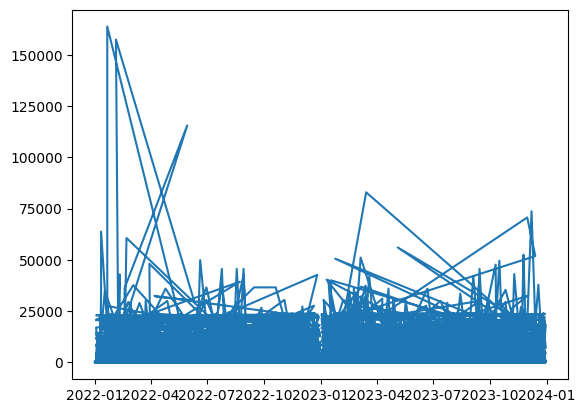

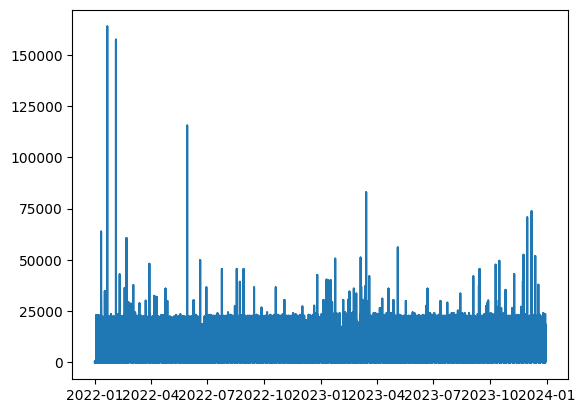

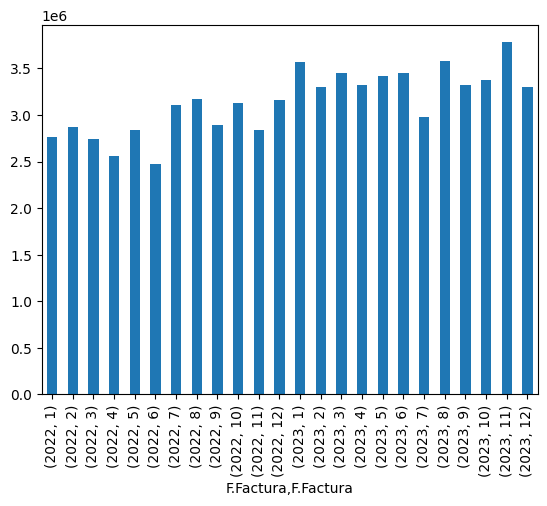

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype    
---  ------     --------------  -----    
 0   F.Factura  24 non-null     period[M]
 1   Importe    24 non-null     float64  
dtypes: float64(1), period[M](1)
memory usage: 512.0 bytes
None
  F.Factura    Importe
0   2022-01 2766562.05
1   2022-02 2875446.57
2   2022-03 2737420.81
3   2022-04 2555191.32
4   2022-05 2842900.16


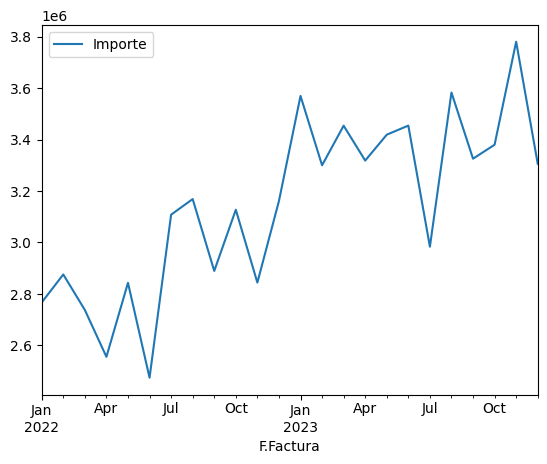

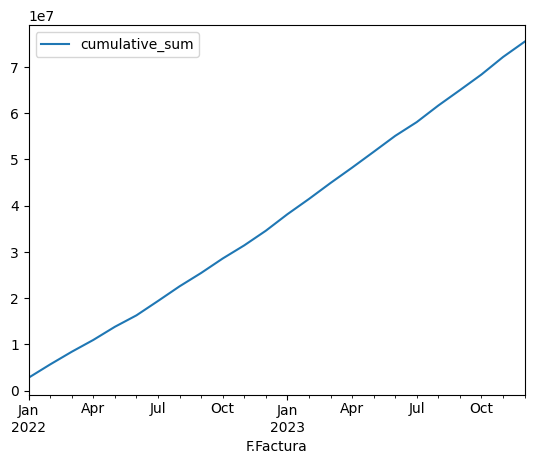

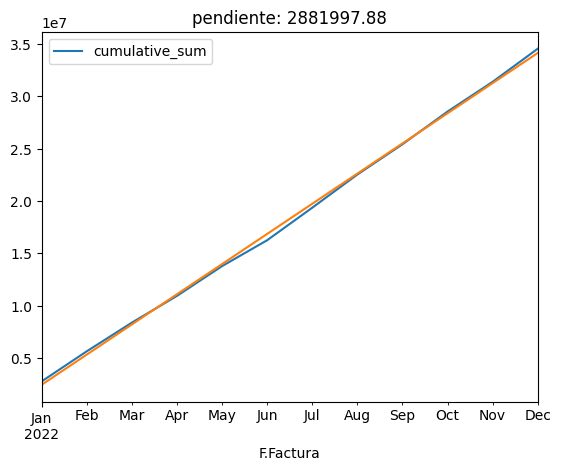

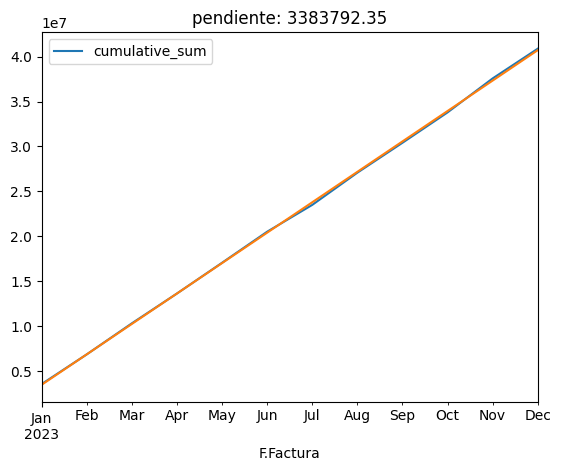

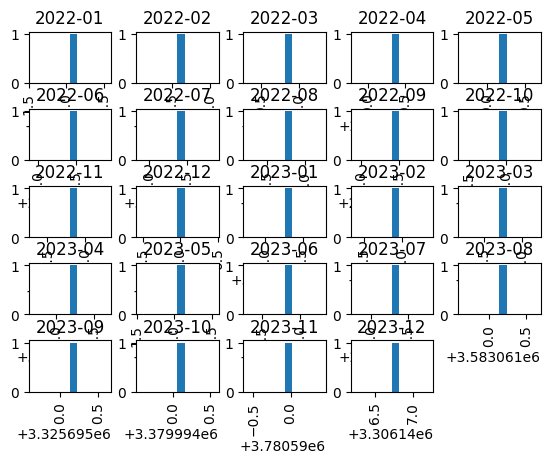

In [ ]:
plt.plot(df['F.Factura'], df['Importe'])
plt.show()

df_temp = df.sort_values(by='F.Factura')

plt.plot(df_temp['F.Factura'], df_temp['Importe'])
plt.show()



df.groupby([df['F.Factura'].dt.year, df['F.Factura'].dt.month])['Importe'].sum().plot(kind='bar')
plt.show()

temp_2 = df_temp.groupby(df_temp['F.Factura'].dt.to_period('M'))['Importe'].sum().reset_index()
temp_2['Importe']
print(temp_2.info())
print(temp_2.head())
temp_2.plot(x='F.Factura', y='Importe')
plt.show()

temp_2['cumulative_sum'] = temp_2['Importe'].cumsum()
temp_2.plot(x='F.Factura', y='cumulative_sum')

plt.show()

df_2022 =  df_temp[df_temp['F.Factura'].dt.year == 2022]
temp_1 = df_2022.groupby(df_2022['F.Factura'].dt.to_period('M'))['Importe'].sum().reset_index()
temp_1['cumulative_sum'] = temp_1['Importe'].cumsum()
x = np.arange(len(temp_1['F.Factura']))  # Use index as x-values
slope, intercept = np.polyfit(x, temp_1['cumulative_sum'], 1)
temp_1.plot(x='F.Factura', y='cumulative_sum')
plt.plot(temp_1['F.Factura'], slope * x + intercept, label=f'Slope: {slope:.2f}')  # Add slope line
plt.title(f'pendiente: {slope:.2f}')
plt.show()

df_2023 =  df_temp[df_temp['F.Factura'].dt.year == 2023]
temp_1 = df_2023.groupby(df_2023['F.Factura'].dt.to_period('M'))['Importe'].sum().reset_index()
temp_1['cumulative_sum'] = temp_1['Importe'].cumsum()
x = np.arange(len(temp_1['F.Factura']))  # Use index as x-values
slope, intercept = np.polyfit(x, temp_1['cumulative_sum'], 1)
temp_1.plot(x='F.Factura', y='cumulative_sum')
plt.plot(temp_1['F.Factura'], slope * x + intercept, label=f'Slope: {slope:.2f}')  # Add slope line
plt.title(f'pendiente: {slope:.2f}')
plt.show()

temp_2.hist(column='Importe', by='F.Factura')
plt.show()

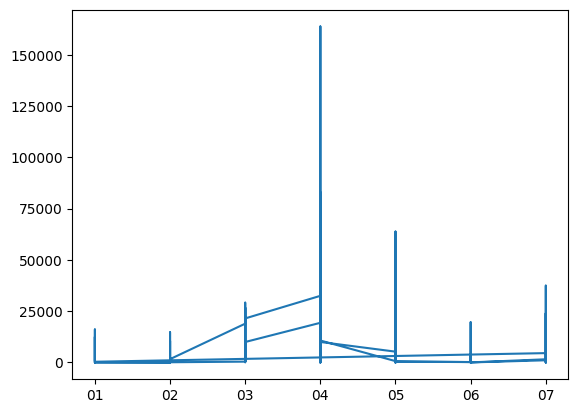

<class 'pandas.core.series.Series'>
Index: 7 entries, 01 to 07
Series name: Importe
Non-Null Count  Dtype  
--------------  -----  
7 non-null      float64
dtypes: float64(1)
memory usage: 112.0+ bytes
None


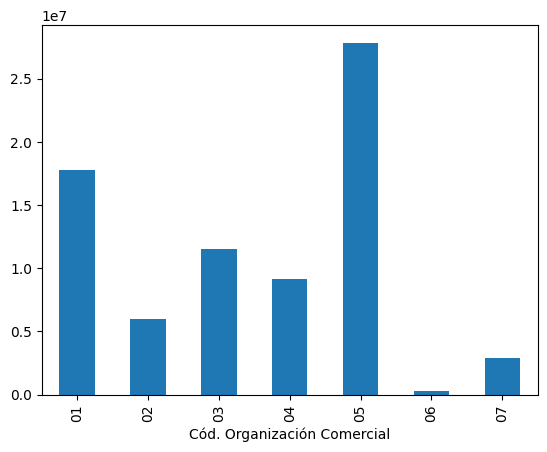

In [ ]:
var_plot = 'Cód. Organización Comercial'

plt.plot(df[var_plot], df['Importe'])
plt.show()

temp = df.groupby(var_plot)['Importe'].sum()
print(temp.info())
temp.plot(kind='bar')
plt.show()

<Figure size 640x480 with 0 Axes>

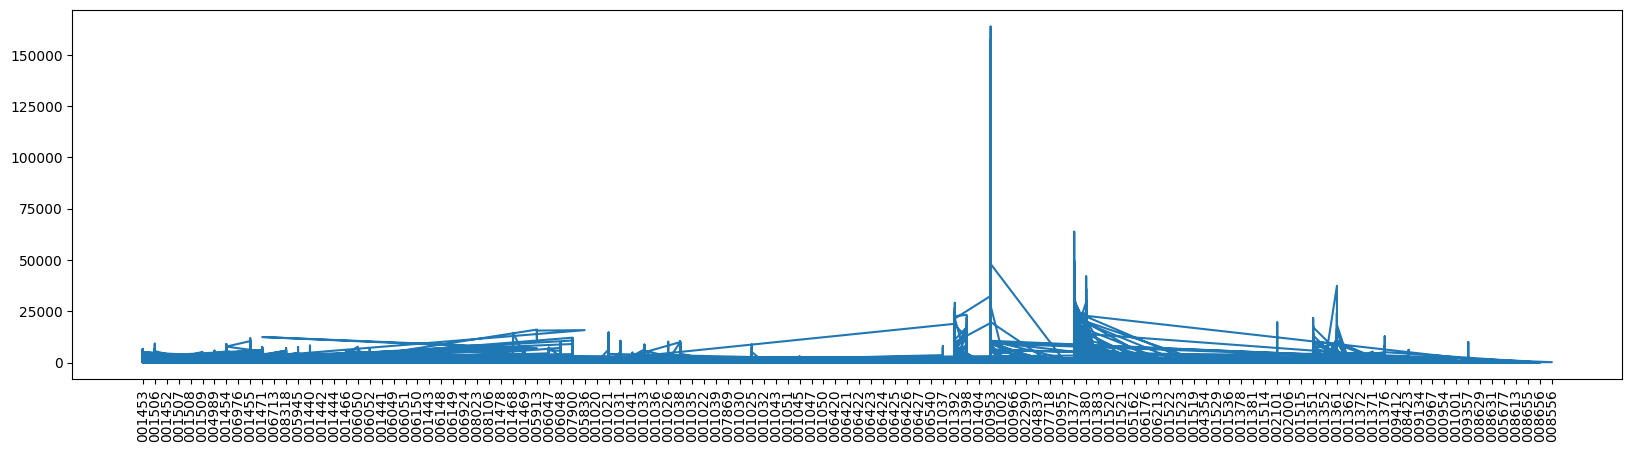

<class 'pandas.core.frame.DataFrame'>
Index: 49997 entries, 4 to 25701
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Cód. Organización Comercial  49997 non-null  object        
 1   Cód. Artículo                49997 non-null  object        
 2   Familia                      49997 non-null  object        
 3   F.Factura                    49997 non-null  datetime64[ns]
 4   Cód. Forma pago              49997 non-null  object        
 5   Canton cliente               49997 non-null  object        
 6   Tipo Cliente                 49997 non-null  object        
 7   Cantidad                     49997 non-null  float64       
 8   Importe                      49997 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 3.8+ MB
None


<Figure size 640x480 with 0 Axes>

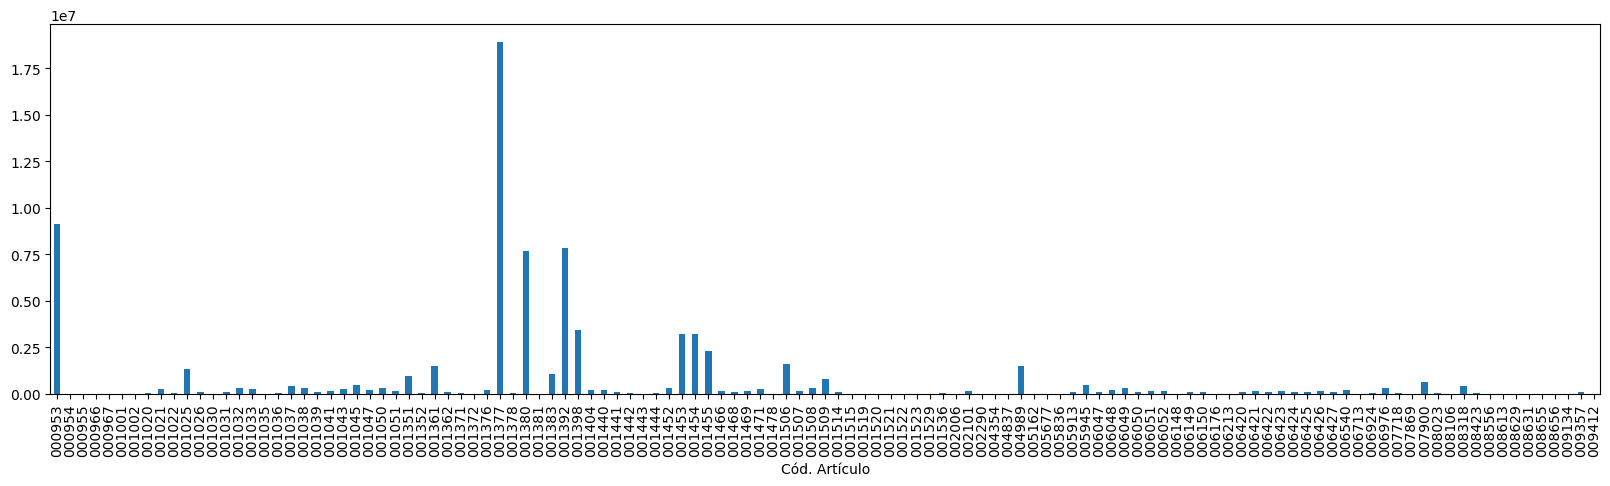

<class 'pandas.core.series.Series'>
Index: 119 entries, 000953 to 009412
Series name: Importe
Non-Null Count  Dtype  
--------------  -----  
119 non-null    float64
dtypes: float64(1)
memory usage: 1.9+ KB
None


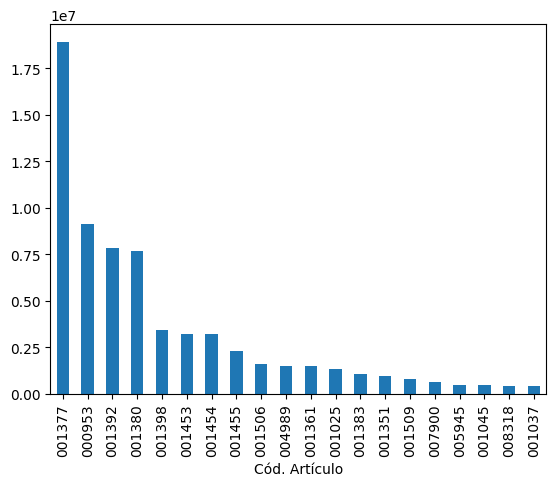

In [ ]:
var_plot = 'Cód. Artículo'

# Ajustar el ancho del eje X (más espacio entre los puntos)
plt.figure(figsize=(20, plt.gcf().get_size_inches()[1]))

plt.plot(df[var_plot], df['Importe'])
# Rotar los nombres del eje X
plt.xticks(rotation=90)
plt.show()

temp_1 = df.groupby(var_plot)['Importe'].sum()

# Ajustar el ancho del eje X (más espacio entre los puntos)
plt.figure(figsize=(20, plt.gcf().get_size_inches()[1]))

print(df.info())
temp_1.plot(kind='bar')
# Rotar los nombres del eje X
plt.xticks(rotation=90)
plt.show()
print(temp_1.info())

temp_2 = temp_1.nlargest(20)
temp_2.plot(kind='bar')
# Rotar los nombres del eje X
plt.xticks(rotation=90)
plt.show()


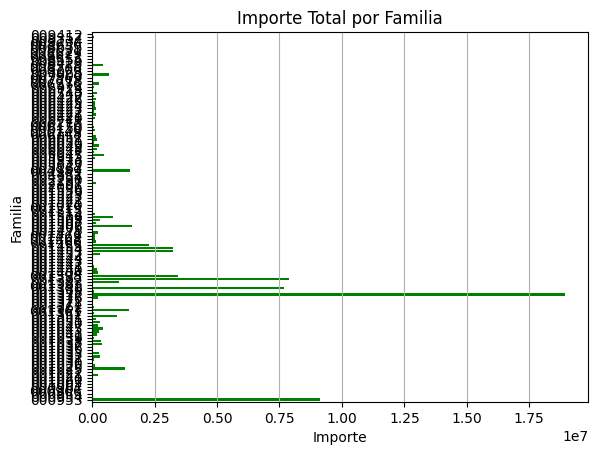

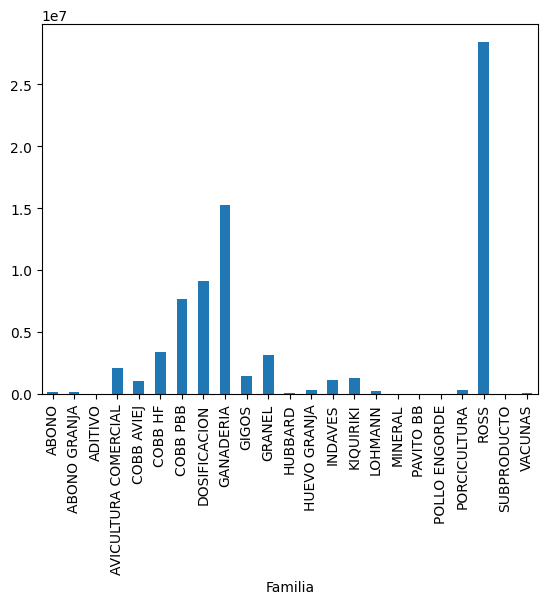

<class 'pandas.core.frame.DataFrame'>
Index: 49997 entries, 4 to 25701
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Cód. Organización Comercial  49997 non-null  object        
 1   Cód. Artículo                49997 non-null  object        
 2   Familia                      49997 non-null  object        
 3   F.Factura                    49997 non-null  datetime64[ns]
 4   Cód. Forma pago              49997 non-null  object        
 5   Canton cliente               49997 non-null  object        
 6   Tipo Cliente                 49997 non-null  object        
 7   Cantidad                     49997 non-null  float64       
 8   Importe                      49997 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 3.8+ MB
None


In [ ]:
var_plot = 'Familia'

temp_1.plot(kind='barh', color='green', width=0.8)
plt.title('Importe Total por Familia')
plt.xlabel('Importe')
plt.ylabel('Familia')
plt.grid(axis='x')
plt.show()


temp_1 = df.groupby(var_plot)['Importe'].sum()
plt.xticks(rotation=45)

temp_1.plot(kind='bar')
plt.show()
print(df.info())

<Figure size 640x480 with 0 Axes>

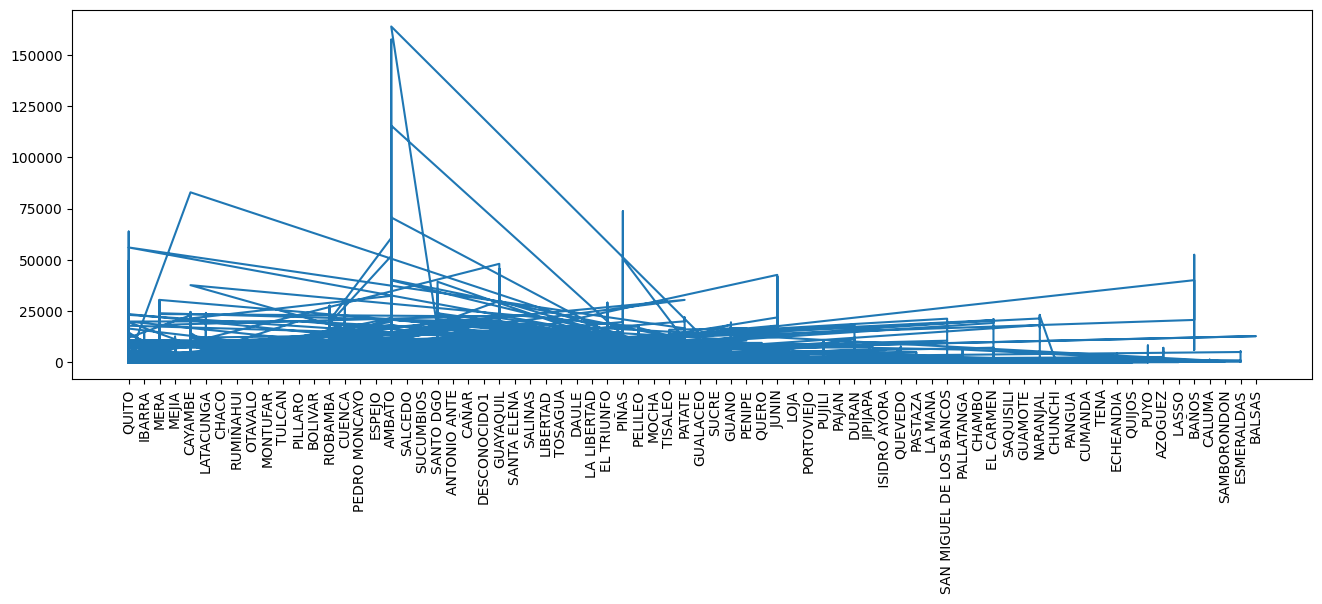

<Figure size 640x480 with 0 Axes>

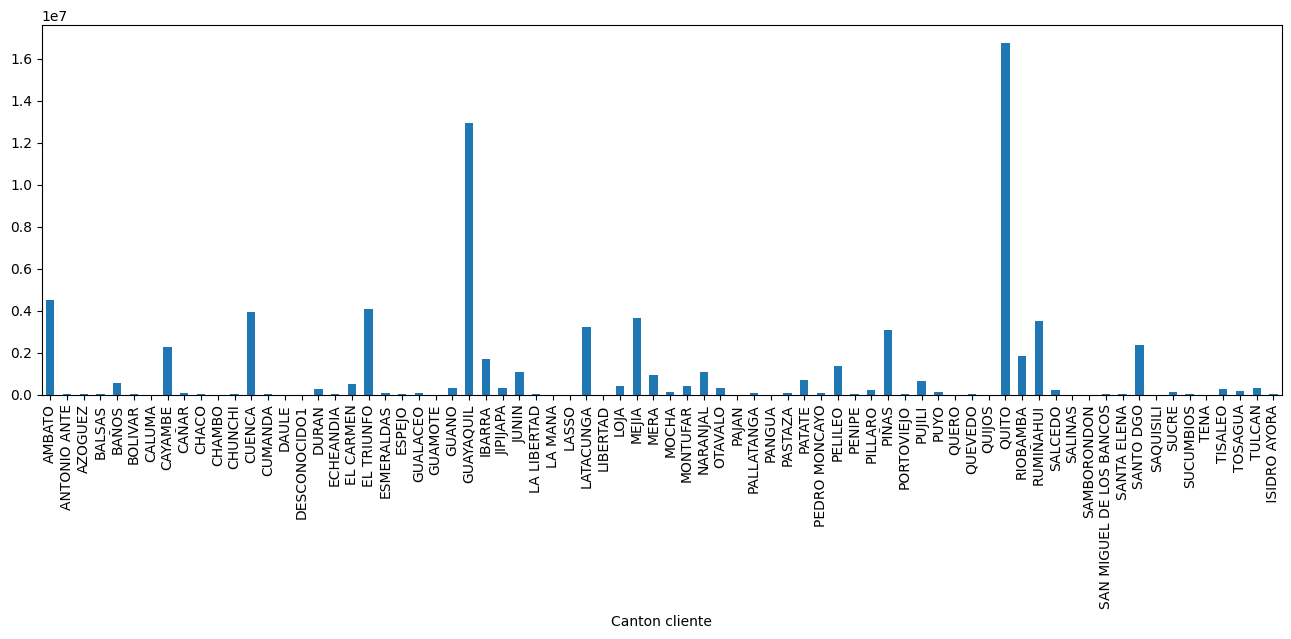

<class 'pandas.core.frame.DataFrame'>
Index: 49997 entries, 4 to 25701
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Cód. Organización Comercial  49997 non-null  object        
 1   Cód. Artículo                49997 non-null  object        
 2   Familia                      49997 non-null  object        
 3   F.Factura                    49997 non-null  datetime64[ns]
 4   Cód. Forma pago              49997 non-null  object        
 5   Canton cliente               49997 non-null  object        
 6   Tipo Cliente                 49997 non-null  object        
 7   Cantidad                     49997 non-null  float64       
 8   Importe                      49997 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 3.8+ MB
None


In [ ]:
var_plot = 'Canton cliente'

# Ajustar el ancho del eje X (más espacio entre los puntos)
plt.figure(figsize=(16, plt.gcf().get_size_inches()[1]))

plt.plot(df[var_plot], df['Importe'])
# Rotar los nombres del eje X
plt.xticks(rotation=90)
plt.show()



temp_1 = df.groupby(var_plot)['Importe'].sum()

# Ajustar el ancho del eje X (más espacio entre los puntos)
plt.figure(figsize=(16, plt.gcf().get_size_inches()[1]))

temp_1.plot(kind='bar')
# Rotar los nombres del eje X
plt.xticks(rotation=90)
plt.show()
print(df.info())

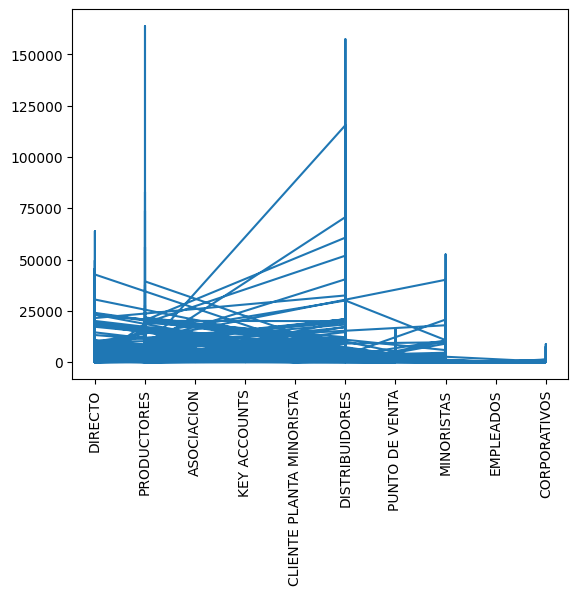

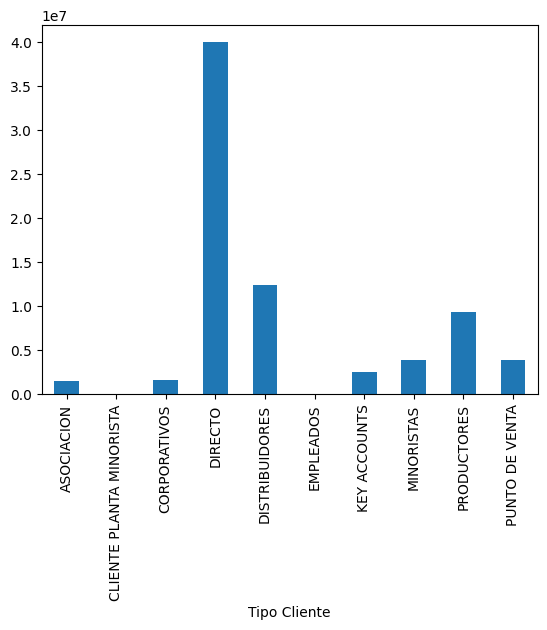

<class 'pandas.core.frame.DataFrame'>
Index: 49997 entries, 4 to 25701
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Cód. Organización Comercial  49997 non-null  object        
 1   Cód. Artículo                49997 non-null  object        
 2   Familia                      49997 non-null  object        
 3   F.Factura                    49997 non-null  datetime64[ns]
 4   Cód. Forma pago              49997 non-null  object        
 5   Canton cliente               49997 non-null  object        
 6   Tipo Cliente                 49997 non-null  object        
 7   Cantidad                     49997 non-null  float64       
 8   Importe                      49997 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 3.8+ MB
None


In [ ]:
var_plot = 'Tipo Cliente'

plt.plot(df[var_plot], df['Importe'])
# Rotar los nombres del eje X
plt.xticks(rotation=90)
plt.show()

temp_1 = df.groupby(var_plot)['Importe'].sum()

temp_1.plot(kind='bar')
# Rotar los nombres del eje X
plt.xticks(rotation=90)
plt.show()
print(df.info())

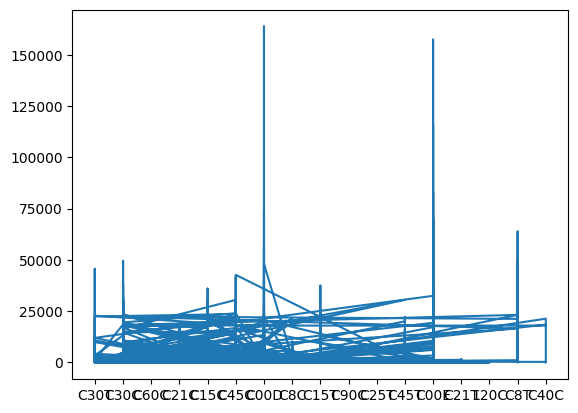

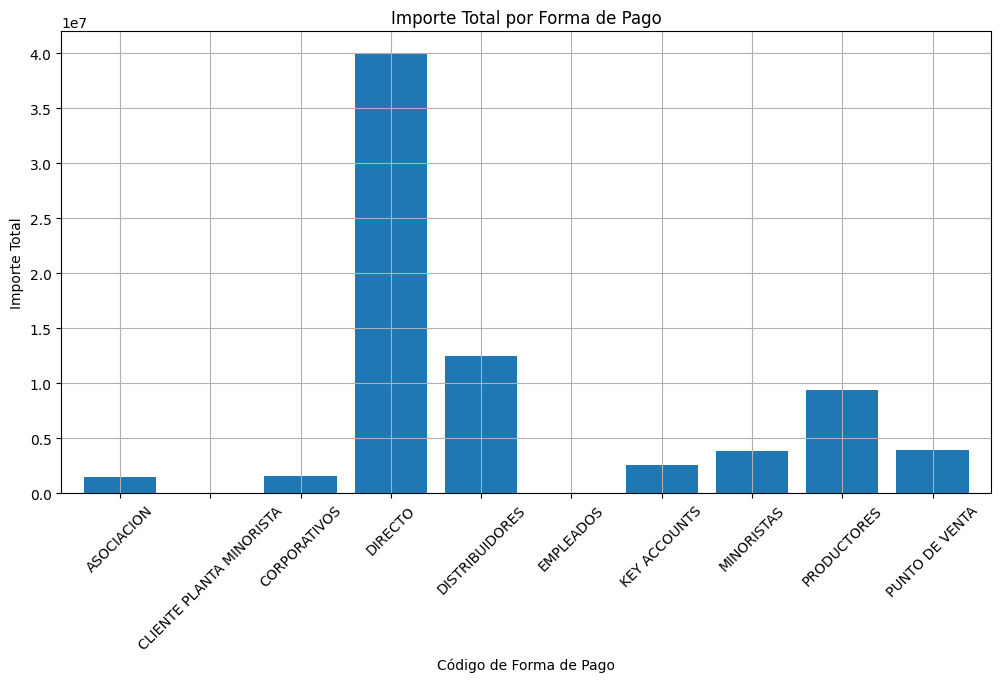

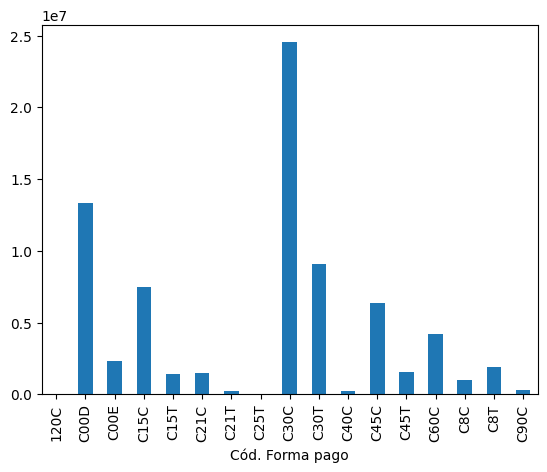

<class 'pandas.core.frame.DataFrame'>
Index: 49997 entries, 4 to 25701
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Cód. Organización Comercial  49997 non-null  object        
 1   Cód. Artículo                49997 non-null  object        
 2   Familia                      49997 non-null  object        
 3   F.Factura                    49997 non-null  datetime64[ns]
 4   Cód. Forma pago              49997 non-null  object        
 5   Canton cliente               49997 non-null  object        
 6   Tipo Cliente                 49997 non-null  object        
 7   Cantidad                     49997 non-null  float64       
 8   Importe                      49997 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 3.8+ MB
None


In [ ]:
var_plot = 'Cód. Forma pago'

plt.plot(df[var_plot], df['Importe'])
plt.show()

plt.figure(figsize=(12, 6))
temp_1.plot(kind='bar', width=0.8)
plt.xticks(rotation=45)
plt.xticks(fontsize=10)
plt.title('Importe Total por Forma de Pago')
plt.xlabel('Código de Forma de Pago')
plt.ylabel('Importe Total')
plt.grid(axis='both')
plt.show()

temp_1 = df.groupby(var_plot)['Importe'].sum()

temp_1.plot(kind='bar')
plt.show()
print(df.info())

MODELOS A ENTRENAR

Se propone crear modelos con el dataframe y provar su exactitud del modelo usando el df control.

Posterior con el mejor modelos ajustado se propone crear una proyeccion del modelo hacia el año 2025

MODELO DE REGRESIÓN LINEAL

In [ ]:
# Definición características (X) y variable objetivo (y) con df (entrenamiento)
X_train = df[['Cód. Organización Comercial', 'Cód. Artículo', 'Familia', 'F.Factura', 'Cód. Forma pago', 'Canton cliente', 'Tipo Cliente', 'Cantidad']]
y_train = df['Importe']

# Definición características (X) y variable objetivo (y) con df_2024 (test)
X_test = df_control[['Cód. Organización Comercial', 'Cód. Artículo', 'Familia', 'F.Factura', 'Cód. Forma pago', 'Canton cliente', 'Tipo Cliente', 'Cantidad']]
y_test = df_control['Importe']

# Concatenar para aplicar dummy
X_combined = pd.concat([X_train, X_test])
X_combined = pd.get_dummies(X_combined)

# Separa los dataset después de aplicar dummy
X_train = X_combined.iloc[:len(X_train)]
X_test = X_combined.iloc[len(X_train):]

# Convertir datetime a representación numérica
for col in X_train.columns:
  if X_train[col].dtype == 'datetime64[ns]':
    X_train[col] = X_train[col].astype('int64')
    X_test[col] = X_test[col].astype('int64')

#Define la columna de agrupamiento
A_column_test = df_control['Tipo Cliente']


<ipython-input-71-3cb62999ccff>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].astype('int64')
<ipython-input-71-3cb62999ccff>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = X_test[col].astype('int64')


REGRESIÓN LINEAL
Error cuadrático medio: 5499506.34
Raíz del Error Cuadrático Medio (RMSE): 2345.10
Error Absoluto Medio (MAE): 1151.47
R-cuadrado: 0.70


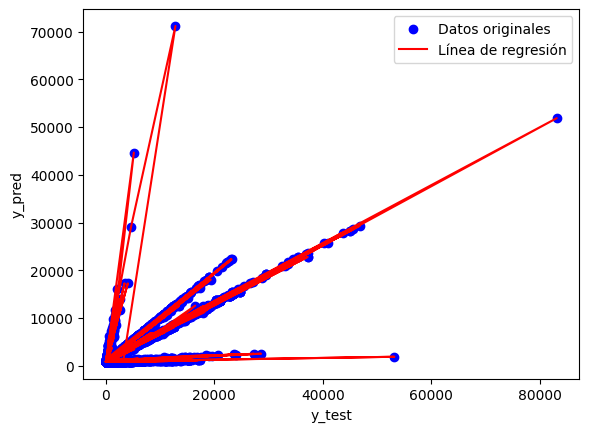

In [ ]:
#REGRESIÓ LINEAL

# Crear el modelo de regresión lineal
regresion_lineal = LinearRegression()

# Entrenar el modelo
regresion_lineal.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = regresion_lineal.predict(X_test)

print("REGRESIÓN LINEAL")

# Evaluar el modelo utilizando el conjunto de prueba (Error cuadrático medio)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse:.2f}")

# Calcula Raíz del Error Cuadrático Medio (RMSE)
rmse = np.sqrt(mse)
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}')

# Calcula Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Error Absoluto Medio (MAE): {mae:.2f}')

# Calcula Coeficiente de Determinación (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-cuadrado: {r2:.2f}")

# Visualizar los resultados
# Use X_test for features and y_test for target values
plt.scatter(y_test, y_pred, color='blue', label='Datos originales') # Changed X to y_test and y to y_pred
plt.plot(y_test, y_pred, color='red', label='Línea de regresión') # Changed X to y_test
plt.xlabel('y_test') # Changed X to y_test
plt.ylabel('y_pred') # Changed y to y_pred
plt.legend()
plt.show()

In [ ]:
# Desactivar la notación científica para los floats
pd.set_option('display.float_format', '{:.2f}'.format)

# Convertir las predicciones y la columna 'Tipo Cliente' en un DataFrame
df_pred = pd.DataFrame({'Tipo Cliente': A_column_test, 'Predicciones': y_pred})

# Agrupar el dataset de predicción
df_pred_group = df_pred.groupby('Tipo Cliente')['Predicciones'].sum().reset_index()

# Agrupar el dataset de prueba
df_control_group = df_control.groupby('Tipo Cliente')['Importe'].sum().reset_index()

# Crear el dataframe de comparación
df_comparacion = pd.DataFrame({
    'TIPO CLIENTE': df_pred_group['Tipo Cliente'],
    'PREDICCIÓN': df_pred_group['Predicciones'],
    'VALOR REAL': df_control_group['Importe'],
    'DIFERENCIA': df_pred_group['Predicciones'] - df_control_group['Importe']
})

print(df_comparacion)

# Sumar los valores PREDICCIÓN
suma_pred = df_comparacion['PREDICCIÓN'].sum()

print("PREDICCIÓN:", suma_pred)

# Sumar los valores REALES
suma_pred = df_comparacion['VALOR REAL'].sum()

print("VALOR REAL:", suma_pred)

# Sumar los valores DIFERENCIA
suma_pred = df_comparacion['DIFERENCIA'].sum()

print("DIFERENCIA:", suma_pred)

               TIPO CLIENTE  PREDICCIÓN  VALOR REAL  DIFERENCIA
0                ASOCIACION   248901.90   553784.79  -304882.89
1  CLIENTE PLANTA MINORISTA   167499.80    12668.77   154831.03
2              CORPORATIVOS    96781.68    21226.56    75555.12
3                   DIRECTO 10148306.35 12657797.93 -2509491.58
4            DISTRIBUIDORES  1267392.32  1496211.60  -228819.28
5                 EMPLEADOS   518493.92     5772.29   512721.63
6              KEY ACCOUNTS   410845.68   350951.80    59893.88
7                MINORISTAS  1691777.66   690718.33  1001059.33
8               PRODUCTORES   545000.10   567500.22   -22500.12
9            PUNTO DE VENTA  3064328.00  2314222.63   750105.37
PREDICCIÓN: 18159327.4005441
VALOR REAL: 18670854.92
DIFERENCIA: -511527.5194559009


MODELO DE DECISIONTREEREGRESSOR Y RANDOM FOREST

In [ ]:
# Definición características (X) y variable objetivo (y) con df (entrenamiento)
X_train = df[['Cód. Organización Comercial', 'Cód. Artículo', 'Familia', 'F.Factura', 'Cód. Forma pago', 'Canton cliente', 'Tipo Cliente', 'Cantidad']]
y_train = df['Importe']

# Definición características (X) y variable objetivo (y) con df_control (test)
X_test = df_control[['Cód. Organización Comercial', 'Cód. Artículo', 'Familia', 'F.Factura', 'Cód. Forma pago', 'Canton cliente', 'Tipo Cliente', 'Cantidad']]
y_test = df_control['Importe']

# Concatenar para aplicar dummy
X_combined = pd.concat([X_train, X_test])
X_combined = pd.get_dummies(X_combined)

# Separa los dataset después de aplicar dummy
X_train = X_combined.iloc[:len(X_train)]
X_test = X_combined.iloc[len(X_train):]

# Convertir datetime a representación numérica
for col in X_train.columns:
  if X_train[col].dtype == 'datetime64[ns]':
    X_train[col] = X_train[col].astype('int64')
    X_test[col] = X_test[col].astype('int64')

#Define la columna de agrupamiento
A_column_test = df_control['Tipo Cliente']

<ipython-input-74-fec2e4b30556>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].astype('int64')
<ipython-input-74-fec2e4b30556>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = X_test[col].astype('int64')


In [ ]:
#DECISIONTREEREGRESSOR

# Crear el modelo de árbol de decisión
regressortree = DecisionTreeRegressor(max_depth=50, min_samples_split=5, min_samples_leaf=4, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
regressortree.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred = regressortree.predict(X_test)

print("DECISIONTREEREGRESSOR")

# Evaluar el modelo utilizando el conjunto de prueba (Error cuadrático medio)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse:.2f}")

# Calcula Raíz del Error Cuadrático Medio (RMSE)
rmse = np.sqrt(mse)
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}')

# Calcula Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Error Absoluto Medio (MAE): {mae:.2f}')

# Calcula Coeficiente de Determinación (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-cuadrado: {r2:.2f}")

DECISIONTREEREGRESSOR
Error cuadrático medio: 357514.41
Raíz del Error Cuadrático Medio (RMSE): 597.93
Error Absoluto Medio (MAE): 82.86
R-cuadrado: 0.98


In [ ]:
# Desactivar la notación científica para los floats
pd.set_option('display.float_format', '{:.2f}'.format)

# Convertir las predicciones y la columna 'Tipo Cliente' en un DataFrame
df_pred = pd.DataFrame({'Tipo Cliente': A_column_test, 'Predicciones': y_pred})

# Agrupar el dataset de predicción
df_pred_group = df_pred.groupby('Tipo Cliente')['Predicciones'].sum().reset_index()

# Agrupar el dataset de prueba
df_control_group = df_control.groupby('Tipo Cliente')['Importe'].sum().reset_index()

# Crear el dataframe de comparación
df_comparacion = pd.DataFrame({
    'TIPO CLIENTE': df_pred_group['Tipo Cliente'],
    'PREDICCIÓN': df_pred_group['Predicciones'],
    'VALOR REAL': df_control_group['Importe'],
    'DIFERENCIA': df_pred_group['Predicciones'] - df_control_group['Importe']
})

print(df_comparacion)

# Sumar los valores PREDICCIÓN
suma_pred = df_comparacion['PREDICCIÓN'].sum()

print("PREDICCIÓN:", suma_pred)

# Sumar los valores REALES
suma_pred = df_comparacion['VALOR REAL'].sum()

print("VALOR REAL:", suma_pred)

# Sumar los valores DIFERENCIA
suma_pred = df_comparacion['DIFERENCIA'].sum()

print("DIFERENCIA:", suma_pred)

               TIPO CLIENTE  PREDICCIÓN  VALOR REAL  DIFERENCIA
0                ASOCIACION   556871.80   553784.79     3087.01
1  CLIENTE PLANTA MINORISTA    12518.67    12668.77     -150.10
2              CORPORATIVOS    21159.22    21226.56      -67.34
3                   DIRECTO 12635375.36 12657797.93   -22422.57
4            DISTRIBUIDORES  1503055.23  1496211.60     6843.63
5                 EMPLEADOS     5641.91     5772.29     -130.38
6              KEY ACCOUNTS   371408.53   350951.80    20456.73
7                MINORISTAS   725710.28   690718.33    34991.95
8               PRODUCTORES   644344.13   567500.22    76843.91
9            PUNTO DE VENTA  2194361.38  2314222.63  -119861.25
PREDICCIÓN: 18670446.516000003
VALOR REAL: 18670854.92
DIFERENCIA: -408.4039999997185


In [ ]:
#RANDOMFORESTREGRESSOR

# Crear el modelo de Random Forest para regresión
regressorrandom = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
regressorrandom.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred = regressorrandom.predict(X_test)

print("RANDOMFORESTREGRESSOR")

# Evaluar el modelo usando el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse:.2f}")

# Calcula Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Error Absoluto Medio (MAE): {mae:.2f}')

# Calcula Coeficiente de Determinación (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-cuadrado: {r2:.2f}")

RANDOMFORESTREGRESSOR
Error cuadrático medio (MSE): 248301.27
Raíz del error cuadrático medio (RMSE): 498.30
Error Absoluto Medio (MAE): 67.08
R-cuadrado: 0.99


In [ ]:
# Desactivar la notación científica para los floats
pd.set_option('display.float_format', '{:.2f}'.format)

# Convertir las predicciones y la columna 'Tipo Cliente' en un DataFrame
df_pred = pd.DataFrame({'Tipo Cliente': A_column_test, 'Predicciones': y_pred})

# Agrupar el dataset de predicción
df_pred_group = df_pred.groupby('Tipo Cliente')['Predicciones'].sum().reset_index()

# Agrupar el dataset de prueba
df_control_group = df_control.groupby('Tipo Cliente')['Importe'].sum().reset_index()

#print(df_2024_group)

# Crear el dataframe de comparación
df_comparacion = pd.DataFrame({
    'TIPO CLIENTE': df_pred_group['Tipo Cliente'],
    'PREDICCIÓN': df_pred_group['Predicciones'],
    'VALOR REAL': df_control_group['Importe'],
    'DIFERENCIA': df_pred_group['Predicciones'] - df_control_group['Importe']
})

print(df_comparacion)

# Sumar los valores PREDICCIÓN
suma_pred = df_comparacion['PREDICCIÓN'].sum()

print("PREDICCIÓN:", suma_pred)

# Sumar los valores REALES
suma_pred = df_comparacion['VALOR REAL'].sum()

print("VALOR REAL:", suma_pred)

# Sumar los valores DIFERENCIA
suma_pred = df_comparacion['DIFERENCIA'].sum()

print("DIFERENCIA:", suma_pred)

               TIPO CLIENTE  PREDICCIÓN  VALOR REAL  DIFERENCIA
0                ASOCIACION   556535.75   553784.79     2750.96
1  CLIENTE PLANTA MINORISTA    12439.16    12668.77     -229.61
2              CORPORATIVOS    21013.51    21226.56     -213.05
3                   DIRECTO 12622445.76 12657797.93   -35352.17
4            DISTRIBUIDORES  1521502.42  1496211.60    25290.82
5                 EMPLEADOS     5650.57     5772.29     -121.72
6              KEY ACCOUNTS   368423.88   350951.80    17472.08
7                MINORISTAS   719720.97   690718.33    29002.64
8               PRODUCTORES   612333.11   567500.22    44832.89
9            PUNTO DE VENTA  2227491.91  2314222.63   -86730.72
PREDICCIÓN: 18667557.056391668
VALOR REAL: 18670854.92
DIFERENCIA: -3297.863608331929


MODELO DE RED NEURONAL 1

In [ ]:
# Definición características (X) y variable objetivo (y) con df (entrenamiento)
X_train = df[['Cód. Organización Comercial', 'Cód. Artículo', 'Familia', 'F.Factura', 'Cód. Forma pago', 'Canton cliente', 'Tipo Cliente', 'Cantidad']]
y_train = df['Importe']

# Definición características (X) y variable objetivo (y) con df_2024 (test)
X_test = df_control[['Cód. Organización Comercial', 'Cód. Artículo', 'Familia', 'F.Factura', 'Cód. Forma pago', 'Canton cliente', 'Tipo Cliente', 'Cantidad']]
y_test = df_control['Importe']

# Concatenar para aplicar dummy
X_combined = pd.concat([X_train, X_test])
X_combined = pd.get_dummies(X_combined)

# Separa los dataset después de aplicar dummy
X_train = X_combined.iloc[:len(X_train)]
X_test = X_combined.iloc[len(X_train):]

# Convertir datetime a representación numérica
for col in X_train.columns:
  if X_train[col].dtype == 'datetime64[ns]':
    X_train[col] = X_train[col].astype('int64')
    X_test[col] = X_test[col].astype('int64')

#Define la columna de agrupamiento
A_column_test = df_control['Tipo Cliente']

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<ipython-input-79-5607a1908ab1>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].astype('int64')
<ipython-input-79-5607a1908ab1>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = X_test[col].astype('int64')


In [ ]:
#RED NEURONAL PROFUNDA DE REGRESIÓN

# Define el modelo de red neuronal profunda
neuralnetwork = models.Sequential()

# Capa de entrada densa con 128 nodos
neuralnetwork.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
neuralnetwork.add(layers.Dropout(0.3))  # Dropout para evitar sobreajuste

# Varias capas ocultas
neuralnetwork.add(layers.Dense(64, activation='relu'))
neuralnetwork.add(layers.Dropout(0.3))

neuralnetwork.add(layers.Dense(32, activation='relu'))
neuralnetwork.add(layers.Dropout(0.3))

# Capa de salida para regresión (sin activación, para predecir un valor continuo)
neuralnetwork.add(layers.Dense(1, activation='linear'))

# Compilar el modelo
neuralnetwork.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Entrenar el modelo
history = neuralnetwork.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Hacer predicciones con el conjunto de prueba
y_pred = neuralnetwork.predict(X_test)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 7774625.5000 - mae: 960.0082 - val_loss: 17570222.0000 - val_mae: 1664.1562
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3998750.2500 - mae: 645.1091 - val_loss: 25681746.0000 - val_mae: 1591.9427
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3254061.2500 - mae: 593.7923 - val_loss: 41010680.0000 - val_mae: 1629.1987
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 3561213.5000 - mae: 570.0018 - val_loss: 50283936.0000 - val_mae: 1653.5320
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3154501.2500 - mae: 560.4835 - val_loss: 90825520.0000 - val_mae: 1739.7164
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 2709124.7500 - mae: 533.2683 - val_loss: 159190896.0000 - val_mae: 1911.9095
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1926061.7500 - mae: 507.6176 - val_loss: 287828128.0000 - val_mae: 2174.9685
Epoch 8/50
1250/1250 ━━━━━━━━━━━

In [ ]:
# Evaluar el modelo 1.1
# Convert y_test to a NumPy array with float32 data type
#test_loss, test_mae = neuralnetwork.evaluate(X_test, y_test.astype('float32'))

#print(f"Error absoluto medio en test: {test_mae:.2f}")

print("RED NEURONAL 1.1")

# Evaluar el modelo utilizando el conjunto de prueba (Error cuadrático medio)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse:.2f}")

# Calcula Raíz del Error Cuadrático Medio (RMSE)
rmse = np.sqrt(mse)
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}')

# Calcula Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Error Absoluto Medio (MAE): {mae:.2f}')

# Calcula Coeficiente de Determinación (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-cuadrado: {r2:.2f}")

RED NEURONAL 1.1
Error cuadrático medio: 1975086477.38
Raíz del Error Cuadrático Medio (RMSE): 44441.95
Error Absoluto Medio (MAE): 4275.14
R-cuadrado: -105.25


In [ ]:
# Desactivar la notación científica para los floats
pd.set_option('display.float_format', '{:.2f}'.format)

# Convertir las predicciones y la columna 'Tipo Cliente' en un DataFrame
df_pred = pd.DataFrame({'Tipo Cliente': A_column_test, 'Predicciones': y_pred.flatten()})

# Agrupar el dataset de predicción
df_pred_group = df_pred.groupby('Tipo Cliente')['Predicciones'].sum().reset_index()

# Agrupar el dataset de prueba
df_control_group = df_control.groupby('Tipo Cliente')['Importe'].sum().reset_index()

# Crear el dataframe de comparación
df_comparacion = pd.DataFrame({
    'TIPO CLIENTE': df_pred_group['Tipo Cliente'],
    'PREDICCIÓN': df_pred_group['Predicciones'],
    'VALOR REAL': df_control_group['Importe'],
    'DIFERENCIA': df_pred_group['Predicciones'] - df_control_group['Importe']
})

print(df_comparacion)

# Sumar los valores PREDICCIÓN
suma_pred = df_comparacion['PREDICCIÓN'].sum()

print("PREDICCIÓN:", suma_pred)

# Sumar los valores REALES
suma_pred = df_comparacion['VALOR REAL'].sum()

print("VALOR REAL:", suma_pred)

# Sumar los valores DIFERENCIA
suma_pred = df_comparacion['DIFERENCIA'].sum()

print("DIFERENCIA:", suma_pred)

               TIPO CLIENTE  PREDICCIÓN  VALOR REAL  DIFERENCIA
0                ASOCIACION   487727.12   553784.79   -66057.67
1  CLIENTE PLANTA MINORISTA    16850.72    12668.77     4181.95
2              CORPORATIVOS    19173.62    21226.56    -2052.94
3                   DIRECTO 34536336.00 12657797.93 21878538.07
4            DISTRIBUIDORES 11147206.00  1496211.60  9650994.40
5                 EMPLEADOS    29574.79     5772.29    23802.50
6              KEY ACCOUNTS   351845.22   350951.80      893.42
7                MINORISTAS  2086862.25   690718.33  1396143.92
8               PRODUCTORES  4855383.00   567500.22  4287882.78
9            PUNTO DE VENTA  3310740.50  2314222.63   996517.87
PREDICCIÓN: 56841696.0
VALOR REAL: 18670854.92
DIFERENCIA: 38170844.30070312


In [ ]:
# Definir el modelo de red neuronal profunda mejorado
model = models.Sequential()

# Capa de entrada con regularización L2 y más nodos
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],),
                       kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))  # Reducir el dropout para permitir más flujo de información

# Capas ocultas adicionales con regularización L2
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Capa de salida para regresión
model.add(layers.Dense(1, activation='linear'))

# Compilar el modelo usando una tasa de aprendizaje más baja
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Entrenar el modelo durante más épocas y con un batch size más pequeño
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 5794694.5000 - mae: 876.0995 - val_loss: 10365741.0000 - val_mae: 1271.3156
Epoch 2/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 2318293.5000 - mae: 534.3278 - val_loss: 15925785.0000 - val_mae: 939.2806
Epoch 3/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 935984.8125 - mae: 440.6788 - val_loss: 58911720.0000 - val_mae: 1140.0359
Epoch 4/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 1165670.5000 - mae: 441.3784 - val_loss: 99258176.0000 - val_mae: 1248.8347
Epoch 5/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 752601.0000 - mae: 407.1067 - val_loss: 82665600.0000 - val_mae: 1448.5573
Epoch 6/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 781835.0625 - mae: 403.3822 - val_loss: 238180288.0000 - val_mae: 1665.0007
Epoch 7/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 661568.2500 - mae: 392.6487 - val_loss: 242183904.0000 - val_mae: 1637.9091
Epoch 8/100
2500/2500 ━

In [ ]:
# Evaluar el modelo 1.2
# Convert y_test to a NumPy array with float32 data type
#test_loss, test_mae = neuralnetwork.evaluate(X_test, y_test.astype('float32'))

#print(f"Error absoluto medio en test: {test_mae:.2f}")

print("RED NEURONAL 1.2")

# Evaluar el modelo utilizando el conjunto de prueba (Error cuadrático medio)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse:.2f}")

# Calcula Raíz del Error Cuadrático Medio (RMSE)
rmse = np.sqrt(mse)
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}')

# Calcula Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Error Absoluto Medio (MAE): {mae:.2f}')

# Calcula Coeficiente de Determinación (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-cuadrado: {r2:.2f}")

RED NEURONAL 1.2
Error cuadrático medio: 34438258.23
Raíz del Error Cuadrático Medio (RMSE): 5868.41
Error Absoluto Medio (MAE): 918.72
R-cuadrado: -0.85


In [ ]:
# Desactivar la notación científica para los floats
pd.set_option('display.float_format', '{:.2f}'.format)

# Convertir las predicciones y la columna 'Tipo Cliente' en un DataFrame
df_pred = pd.DataFrame({'Tipo Cliente': A_column_test, 'Predicciones': y_pred.flatten()})

# Agrupar el dataset de predicción
df_pred_group = df_pred.groupby('Tipo Cliente')['Predicciones'].sum().reset_index()

# Agrupar el dataset de prueba
df_control_group = df_control.groupby('Tipo Cliente')['Importe'].sum().reset_index()

# Crear el dataframe de comparación
df_comparacion = pd.DataFrame({
    'TIPO CLIENTE': df_pred_group['Tipo Cliente'],
    'PREDICCIÓN': df_pred_group['Predicciones'],
    'VALOR REAL': df_control_group['Importe'],
    'DIFERENCIA': df_pred_group['Predicciones'] - df_control_group['Importe']
})

print(df_comparacion)

# Sumar los valores PREDICCIÓN
suma_pred = df_comparacion['PREDICCIÓN'].sum()

print("PREDICCIÓN:", suma_pred)

# Sumar los valores REALES
suma_pred = df_comparacion['VALOR REAL'].sum()

print("VALOR REAL:", suma_pred)

# Sumar los valores DIFERENCIA
suma_pred = df_comparacion['DIFERENCIA'].sum()

print("DIFERENCIA:", suma_pred)

               TIPO CLIENTE  PREDICCIÓN  VALOR REAL  DIFERENCIA
0                ASOCIACION   480802.56   553784.79   -72982.23
1  CLIENTE PLANTA MINORISTA    10664.02    12668.77    -2004.75
2              CORPORATIVOS    16010.33    21226.56    -5216.23
3                   DIRECTO 14745850.00 12657797.93  2088052.07
4            DISTRIBUIDORES  2741344.25  1496211.60  1245132.65
5                 EMPLEADOS    12044.56     5772.29     6272.27
6              KEY ACCOUNTS   282064.59   350951.80   -68887.21
7                MINORISTAS   749658.69   690718.33    58940.36
8               PRODUCTORES   801287.69   567500.22   233787.47
9            PUNTO DE VENTA  1829520.12  2314222.63  -484702.50
PREDICCIÓN: 21669248.0
VALOR REAL: 18670854.92
DIFERENCIA: 2998391.8954296876


In [ ]:
# Calcular el Error Absoluto Medio (MAE)
mae = np.mean(np.abs(y_test - y_pred.flatten())) # Changed line

# Calcular el promedio de los valores reales
y_true_mean = np.mean(y_test)

# Calcular el MAE en porcentaje
mae_percentage = (mae / y_true_mean) * 100

print(f"MAE: {mae}")
print(f"MAE en porcentaje: {mae_percentage:.2f}%")

MAE: 918.715801880457
MAE en porcentaje: 50.42%


MODELO DE RED NEURONAL 2
(TIEMPO VS IMPORTE)


Al estudiar los datos para crear una red nueronal decidimos tomar otro aproach.


En este caso realizaremos una predicción de los valores a futuro usando una serie temporal

Asi sacaremos el máximo a la herramiento de red nueronal y el desafío sera la creación de una matriz de aprendizaje supervisado que la red nueronal pueda tomar y entrenar

Para la serie temporal se procede a crear un nuevo datarame que agrupe las facturas en días, teniendo en cuenta que tenemos datos de dos años deberemos tener 730 dias aprox teniendo en cuenta que se debe rellenar los días que no tengan ventas con un 0 y asi tener la serie temporal completa.

In [ ]:
# df_rn_1 = df[['F.Factura','Tipo Cliente','Importe']].copy()
df_rn_1 = df[['F.Factura','Importe']].copy()
df_rn_1 = df_rn_1.sort_values(by='F.Factura')
print(df_rn_1.info())
print('\n\n')
print(df_rn_1.head())
print('\n\n')
print(df_rn_1)

df_rn_1 = df_rn_1.groupby('F.Factura')['Importe'].sum()
print('\n\n')
print(df_rn_1)
print(df_rn_1.info())

df_rn_1 = df_rn_1.reset_index()
df_rn_1.columns = ['F.Factura', 'Importe']
print('\n\n')
print(df_rn_1.info())

date_range = pd.date_range(start=df_rn_1['F.Factura'].min(), end=df_rn_1['F.Factura'].max())
df_complete = pd.DataFrame({'F.Factura': date_range})
print(df_complete.info())

df_rn_1 = df_complete.merge(df_rn_1, on='F.Factura', how='left')
df_rn_1['Importe'] = df_rn_1['Importe'].fillna(0)
print(df_rn_1.info())

print('##################################################')
##################################################
# df_control

df_control_rn = df_control[['F.Factura','Importe']].copy()
df_control_rn = df_control_rn.sort_values(by='F.Factura')
print(df_control_rn.info())
print('\n\n')
print(df_control_rn.head())
print('\n\n')
print(df_control_rn)

df_control_rn = df_control_rn.groupby('F.Factura')['Importe'].sum()
print('\n\n')
print(df_control_rn[0])
print(df_control_rn.info())

df_control_rn = df_control_rn.reset_index()
df_control_rn.columns = ['F.Factura', 'Importe']
print('\n\n')
print(df_control_rn.info())
df_control_rn = df_control_rn[:-1]

date_range_con = pd.date_range(start=df_control_rn['F.Factura'].min(), end=df_control_rn['F.Factura'].max())
df_complete_con = pd.DataFrame({'F.Factura': date_range_con})
print(df_complete_con.info())

df_control_rn = df_complete_con.merge(df_control_rn, on='F.Factura', how='left')
df_control_rn['Importe'] = df_control_rn['Importe'].fillna(0)
print(df_control_rn.info())



<class 'pandas.core.frame.DataFrame'>
Index: 49997 entries, 14661 to 21039
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   F.Factura  49997 non-null  datetime64[ns]
 1   Importe    49997 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 MB
None



       F.Factura  Importe
14661 2022-01-01    21.24
14059 2022-01-01   166.08
13390 2022-01-01   419.04
15248 2022-01-01   176.58
13078 2022-01-01   155.52



       F.Factura  Importe
14661 2022-01-01    21.24
14059 2022-01-01   166.08
13390 2022-01-01   419.04
15248 2022-01-01   176.58
13078 2022-01-01   155.52
...          ...      ...
14256 2023-12-29  1018.33
20918 2023-12-30 18486.00
21164 2023-12-30  4550.40
21202 2023-12-30  7110.00
21039 2023-12-30   765.00

[49997 rows x 2 columns]



F.Factura
2022-01-01     3329.70
2022-01-02     2762.79
2022-01-03   201642.89
2022-01-04    64035.82
2022-01-05   107043.43
             

<ipython-input-87-bf7f908cb3ac>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df_control_rn[0])


Normalizaremos la serie temporal  para poder usar lo modelos de aprendizaje y tener coherencia en los valores de error a nivel porcentual

     F.Factura   Importe  norm_import
0   2022-01-01   3329.70        -0.99
1   2022-01-02   2762.79        -0.99
2   2022-01-03 201642.89        -0.17
3   2022-01-04  64035.82        -0.74
4   2022-01-05 107043.43        -0.56
..         ...       ...          ...
724 2023-12-26 117814.42        -0.52
725 2023-12-27 163213.60        -0.33
726 2023-12-28 177231.94        -0.27
727 2023-12-29  67476.54        -0.72
728 2023-12-30  30911.40        -0.87

[729 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   F.Factura    729 non-null    datetime64[ns]
 1   Importe      729 non-null    float64       
 2   norm_import  729 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 17.2 KB
None


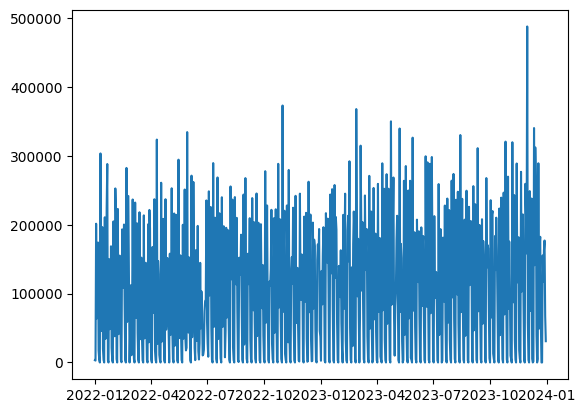

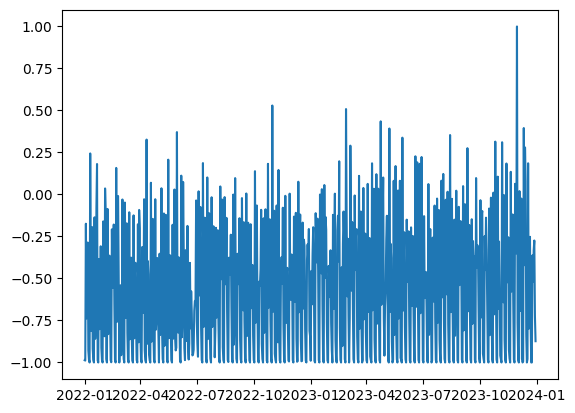

##################################################
     F.Factura   Importe  norm_import
0   2024-01-01  15411.70        -0.92
1   2024-01-02  12155.79        -0.94
2   2024-01-03  23911.89        -0.88
3   2024-01-04  47117.84        -0.77
4   2024-01-05 165632.82        -0.18
..         ...       ...          ...
177 2024-06-26  56725.62        -0.72
178 2024-06-27 254598.30         0.26
179 2024-06-28 122446.80        -0.39
180 2024-06-29  52394.85        -0.74
181 2024-06-30  41368.68        -0.80

[182 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   F.Factura    182 non-null    datetime64[ns]
 1   Importe      182 non-null    float64       
 2   norm_import  182 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.4 KB
None


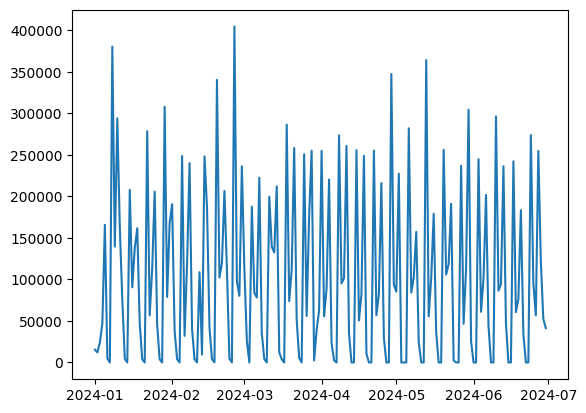

     F.Factura   Importe  norm_import
0   2024-01-01  15411.70        -0.92
1   2024-01-02  12155.79        -0.94
2   2024-01-03  23911.89        -0.88
3   2024-01-04  47117.84        -0.77
4   2024-01-05 165632.82        -0.18
..         ...       ...          ...
177 2024-06-26  56725.62        -0.72
178 2024-06-27 254598.30         0.26
179 2024-06-28 122446.80        -0.39
180 2024-06-29  52394.85        -0.74
181 2024-06-30  41368.68        -0.80

[182 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   F.Factura    182 non-null    datetime64[ns]
 1   Importe      182 non-null    float64       
 2   norm_import  182 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.4 KB
None


In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
values = df_rn_1['Importe'].values.reshape(-1, 1)
scaler.fit_transform(values)

df_rn_1['norm_import'] = scaler.transform(df_rn_1['Importe'].values.reshape(-1, 1))
print(df_rn_1)
print(df_rn_1.info())

plt.plot(df_rn_1['F.Factura'], df_rn_1['Importe'])
plt.show()
plt.plot(df_rn_1['F.Factura'], df_rn_1['norm_import'])
plt.show()
print('##################################################')
##################################################
# df_control
# df_control_rn

scaler_control = MinMaxScaler(feature_range=(-1, 1))
values_control = df_control_rn['Importe'].values.reshape(-1, 1)
scaler_control.fit_transform(values_control)

df_control_rn['norm_import'] = scaler_control.transform(df_control_rn['Importe'].values.reshape(-1, 1))
print(df_control_rn)
print(df_control_rn.info())

plt.plot(df_control_rn['F.Factura'], df_control_rn['Importe'])
plt.show()

print(df_control_rn)
print(df_control_rn.info())

el aprendizaje supervisado consistirá en predecir el valor de un día con las ventas de los otros días. Tomamos una semana de 7 días y predeciremos el valor del 8 día
la matriz tendrá 8 columnas en donde el set de entrada será un vector de 7x1 correspondeinte a los 7 primeros días y la salida sera un vector de 1x1 correspondiente al valor de la última columna

In [ ]:
data = []
for idx in df_rn_1.index:
  if idx < len(df_rn_1)-7:
    data.append([df_rn_1['norm_import'][idx],df_rn_1['norm_import'][idx+1],df_rn_1['norm_import'][idx+2],
                 df_rn_1['norm_import'][idx+3],df_rn_1['norm_import'][idx+4],df_rn_1['norm_import'][idx+5],
                 df_rn_1['norm_import'][idx+6],df_rn_1['norm_import'][idx+7]
                 ])

df_new = pd.DataFrame(data, columns=['t', 't+1', 't+2','t+3','t+4','t+5','t+6','t+8'])
print(df_new)

print('##################################################')
##################################################
# df_control
# df_control_rn

data_control = []
for idx in df_control_rn.index:
  if idx < len(df_control_rn)-7:
    data_control.append([df_control_rn['norm_import'][idx],df_control_rn['norm_import'][idx+1],df_control_rn['norm_import'][idx+2],
                         df_control_rn['norm_import'][idx+3],df_control_rn['norm_import'][idx+4],df_control_rn['norm_import'][idx+5],
                         df_control_rn['norm_import'][idx+6],df_control_rn['norm_import'][idx+7]
                         ])

df_new_control = pd.DataFrame(data_control, columns=['t', 't+1', 't+2','t+3','t+4','t+5','t+6','t+8'])
print(df_new_control)

        t   t+1   t+2   t+3   t+4   t+5   t+6   t+8
0   -0.99 -0.99 -0.17 -0.74 -0.56 -0.29 -0.93 -0.98
1   -0.99 -0.17 -0.74 -0.56 -0.29 -0.93 -0.98 -1.00
2   -0.17 -0.74 -0.56 -0.29 -0.93 -0.98 -1.00  0.24
3   -0.74 -0.56 -0.29 -0.93 -0.98 -1.00  0.24 -0.46
4   -0.56 -0.29 -0.93 -0.98 -1.00  0.24 -0.46 -0.81
..    ...   ...   ...   ...   ...   ...   ...   ...
717 -0.80 -0.31 -0.25 -0.77 -1.00 -1.00 -0.36 -0.52
718 -0.31 -0.25 -0.77 -1.00 -1.00 -0.36 -0.52 -0.33
719 -0.25 -0.77 -1.00 -1.00 -0.36 -0.52 -0.33 -0.27
720 -0.77 -1.00 -1.00 -0.36 -0.52 -0.33 -0.27 -0.72
721 -1.00 -1.00 -0.36 -0.52 -0.33 -0.27 -0.72 -0.87

[722 rows x 8 columns]
##################################################
        t   t+1   t+2   t+3   t+4   t+5   t+6   t+8
0   -0.92 -0.94 -0.88 -0.77 -0.18 -0.98 -1.00  0.88
1   -0.94 -0.88 -0.77 -0.18 -0.98 -1.00  0.88 -0.31
2   -0.88 -0.77 -0.18 -0.98 -1.00  0.88 -0.31  0.45
3   -0.77 -0.18 -0.98 -1.00  0.88 -0.31  0.45 -0.20
4   -0.18 -0.98 -1.00  0.88 -0.31  0.45 -

In [ ]:
x = df_new.drop('t+8', axis=1)
y = df_new['t+8']
print(x.shape)
print(x.info)
print(y.shape)
print(y.info)

x_test = df_new_control.drop('t+8', axis=1)
y_test = df_new_control['t+8']
print(x_test.shape)
print(x_test.info)
print(y_test.shape)

(722, 7)
<bound method DataFrame.info of         t   t+1   t+2   t+3   t+4   t+5   t+6
0   -0.99 -0.99 -0.17 -0.74 -0.56 -0.29 -0.93
1   -0.99 -0.17 -0.74 -0.56 -0.29 -0.93 -0.98
2   -0.17 -0.74 -0.56 -0.29 -0.93 -0.98 -1.00
3   -0.74 -0.56 -0.29 -0.93 -0.98 -1.00  0.24
4   -0.56 -0.29 -0.93 -0.98 -1.00  0.24 -0.46
..    ...   ...   ...   ...   ...   ...   ...
717 -0.80 -0.31 -0.25 -0.77 -1.00 -1.00 -0.36
718 -0.31 -0.25 -0.77 -1.00 -1.00 -0.36 -0.52
719 -0.25 -0.77 -1.00 -1.00 -0.36 -0.52 -0.33
720 -0.77 -1.00 -1.00 -0.36 -0.52 -0.33 -0.27
721 -1.00 -1.00 -0.36 -0.52 -0.33 -0.27 -0.72

[722 rows x 7 columns]>
(722,)
<bound method Series.info of 0     -0.98
1     -1.00
2      0.24
3     -0.46
4     -0.81
       ... 
717   -0.52
718   -0.33
719   -0.27
720   -0.72
721   -0.87
Name: t+8, Length: 722, dtype: float64>
(175, 7)
<bound method DataFrame.info of         t   t+1   t+2   t+3   t+4   t+5   t+6
0   -0.92 -0.94 -0.88 -0.77 -0.18 -0.98 -1.00
1   -0.94 -0.88 -0.77 -0.18 -0.98 -1.00  

Se crea la red nueroanl con 4 capas para provar la predicción y evitar overfiting

los parámetros correspondientes a entrada y salida esta dado por la problemática del aprendizaje supervisado

las neuroans de las capas ocultas son ajustadas con try and error  hsta bajar el error cuadrático medio al mínimo posible

In [ ]:
model = Sequential()

#######################################

model.add(Dense(21, input_dim=7, name= 'entrada',activation='tanh'))

model.add(Dense(7, name = 'oculta2', activation='tanh'))
model.add(Dense(1, name = 'salida', activation='tanh'))

###################################

model.compile(optimizer='adam',loss='mse',metrics=['mae'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ entrada (Dense)                      │ (None, 21)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ oculta2 (Dense)                      │ (None, 7)                   │             154 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ salida (Dense)                       │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 330 (1.29 KB)

 Trainable params: 330 (1.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
modelo_rn = model.fit(x,y,epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.9774 - mae: 0.9073 - val_loss: 0.3781 - val_mae: 0.5324
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2332 - mae: 0.4127 - val_loss: 0.2627 - val_mae: 0.4295
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1348 - mae: 0.3091 - val_loss: 0.2395 - val_mae: 0.3996
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1276 - mae: 0.2964 - val_loss: 0.2142 - val_mae: 0.3792
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1156 - mae: 0.2807 - val_loss: 0.1908 - val_mae: 0.3581
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1009 - mae: 0.2677 - val_loss: 0.1690 - val_mae: 0.3371
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0876 - mae: 0.2489 - val_loss: 0.1502 - val_mae: 0.3152
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0807 - mae: 0.2411 - val_loss: 0.1334 - val_mae: 0.2929
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0804 - mae:

para visualizar la red neuronal se procede a imprimir valores de error cuadrático medio y error absoluto medio

los gráficos también aportan buena imformación sobre el caso

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
0.08220974963402856
0.1977081324744338


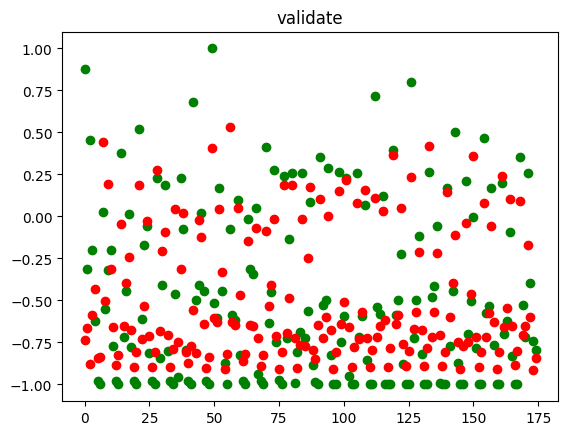

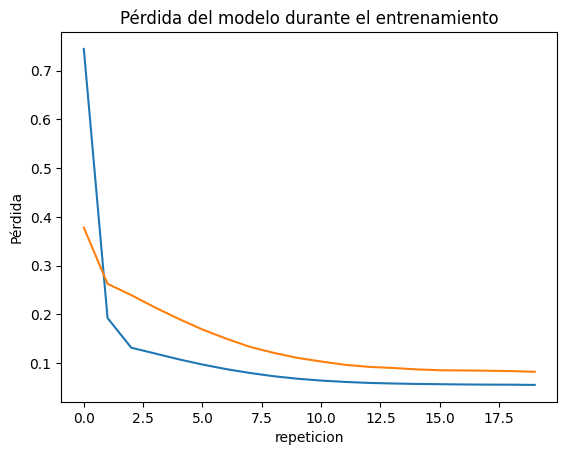

In [ ]:
results=model.predict(x_test)
mse = mean_squared_error(y_test, results)
print(mse)

mae = mean_absolute_error(y_test, results)
print(mae)


plt.scatter(range(len(y_test)),y_test,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

plt.plot(modelo_rn.history['loss'])
plt.plot(modelo_rn.history['val_loss'])
plt.title('Pérdida del modelo durante el entrenamiento')
plt.ylabel('Pérdida')
plt.xlabel('repeticion')
plt.show()

para finalizar realizamos una prediccion del resto del 2024 para tener una idea de como se esta comportando el modelo

cabe mencionar que el modelo al simplificarlo para evitar overfiting requiere de mas data para tener una predicción útil a futuro

[[-1.          0.35325129 -0.52748607 -0.71948676  0.25901125 -0.39448968
  -0.7409028 ]]
(1, 7)
     F.Factura   Importe  norm_import
172 2024-06-21  33854.37        -0.83
173 2024-06-22      0.00        -1.00
174 2024-06-23      0.00        -1.00
175 2024-06-24 273655.60         0.35
176 2024-06-25  95552.16        -0.53
177 2024-06-26  56725.62        -0.72
178 2024-06-27 254598.30         0.26
179 2024-06-28 122446.80        -0.39
180 2024-06-29  52394.85        -0.74
181 2024-06-30  41368.68        -0.80
2024-06-30 00:00:00


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━

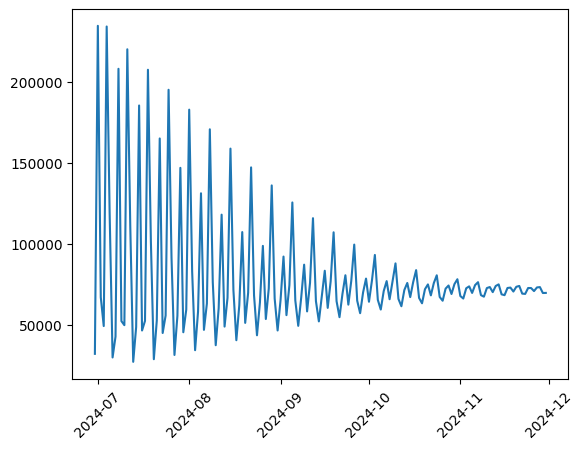

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   F.Factura   154 non-null    datetime64[ns]
 1   Prediccion  154 non-null    float32       
dtypes: datetime64[ns](1), float32(1)
memory usage: 1.9 KB
None


In [ ]:
# print(y_test.iloc[-1])
# print(x_test.iloc[-1])
# print(x_test.iloc[-1].values.reshape(1, -1))

input = x_test.iloc[-1].values.reshape(1, -1)
print(input)
print(input.shape)
mt_pred = []
print(df_control_rn.tail(10))
print(df_control_rn['F.Factura'].iloc[-1])
print('\n')

for i in range(154):
  pred = model.predict(input)
  mt_pred.append(pred[-1][0])
  var_1 = input[-1][1:]
  var_1 = np.append(var_1, pred[-1][0])
  # print(var_1)
  # print('\n')
  # print(input)
  input = np.vstack((input, var_1))
  # print('\n')
  # print(input)


start_date = df_control_rn['F.Factura'].iloc[-1]
dates = pd.date_range(start=start_date, periods=len(mt_pred))
print(dates)




df_pred = pd.DataFrame({'F.Factura': dates, 'Prediccion': mt_pred})
df_pred['Prediccion'] = scaler_control.inverse_transform(np.array(df_pred['Prediccion']).reshape(-1, 1))

plt.plot(df_pred['F.Factura'], df_pred['Prediccion'])
plt.xticks(rotation=45)
plt.show()

print(df_pred.info())


se imprime metricas del nuevo dataframe el cual se lo puede exportar para procesarlo y mostrarlo en una herramiena de analitica

In [ ]:
print(df_pred['Prediccion'].describe())
print(df_pred.to_excel('/content/NR_result.xlsx'))

count      154.00
mean     79353.51
std      38994.31
min      27023.32
25%      62119.10
50%      69795.09
75%      77060.07
max     234579.19
Name: Prediccion, dtype: float64
None


Ahora se presenta el caso para un modelo con overfiting usando la misma matriz de entrenamiento

El modelo con overfiting tendra una mayor presicion pero tenemos que tomar en cuenta que el overfiting elimina la posibilidad de tener picos o data fuera de la media

Cuando hablamos de prediccion de ventas el tener un modelo que no considero esto recae en una prediccion mas conservadora sin riesgo y los picos pasaraian a ser profit de la empresa
Como recordatorio se expone que el modelo no considera picos negativos en ventas ya que en la vida real esto o existe al enfocarnos el las ventas.

In [ ]:
model_over = Sequential()

#######################################

model_over.add(Dense(49, input_dim=7, name= 'entrada',activation='tanh'))
model_over.add(Dense(14, name = 'oculta1', activation='tanh'))
model_over.add(Dense(7, name = 'oculta2', activation='tanh'))
model_over.add(Dense(1, name = 'salida', activation='tanh'))

###################################

model_over.compile(optimizer='adam',loss='mse',metrics=['mae'])
model_over.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ entrada (Dense)                      │ (None, 49)                  │             392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ oculta1 (Dense)                      │ (None, 14)                  │             700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ oculta2 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ salida (Dense)                       │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,205 (4.71 KB)

 Trainable params: 1,205 (4.71 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
modelo_rn_over = model_over.fit(x,y,epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 1.1496 - mae: 0.9056 - val_loss: 0.4396 - val_mae: 0.4852
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2754 - mae: 0.3815 - val_loss: 0.3947 - val_mae: 0.4400
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2130 - mae: 0.3343 - val_loss: 0.2405 - val_mae: 0.3815
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1140 - mae: 0.2800 - val_loss: 0.1259 - val_mae: 0.2769
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0778 - mae: 0.2258 - val_loss: 0.0923 - val_mae: 0.2214
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0576 - mae: 0.1939 - val_loss: 0.0879 - val_mae: 0.2051
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0560 - mae: 0.1856 - val_loss: 0.0847 - val_mae: 0.1986
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0477 - mae: 0.1724 - val_loss: 0.0810 - val_mae: 0.1930
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0544 - mae:

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
0.06837558497660014
0.16336466056565072


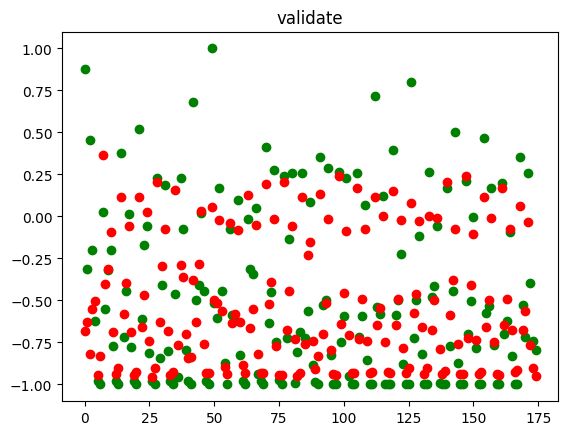

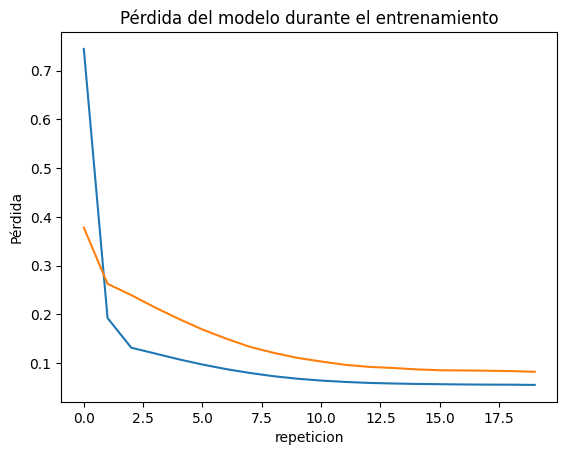

In [ ]:
results=model_over.predict(x_test)
mse = mean_squared_error(y_test, results)
print(mse)

mae = mean_absolute_error(y_test, results)
print(mae)


plt.scatter(range(len(y_test)),y_test,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

plt.plot(modelo_rn.history['loss'])
plt.plot(modelo_rn.history['val_loss'])
plt.title('Pérdida del modelo durante el entrenamiento')
plt.ylabel('Pérdida')
plt.xlabel('repeticion')
plt.show()

[[-1.          0.35325129 -0.52748607 -0.71948676  0.25901125 -0.39448968
  -0.7409028 ]]
(1, 7)
     F.Factura   Importe  norm_import
172 2024-06-21  33854.37        -0.83
173 2024-06-22      0.00        -1.00
174 2024-06-23      0.00        -1.00
175 2024-06-24 273655.60         0.35
176 2024-06-25  95552.16        -0.53
177 2024-06-26  56725.62        -0.72
178 2024-06-27 254598.30         0.26
179 2024-06-28 122446.80        -0.39
180 2024-06-29  52394.85        -0.74
181 2024-06-30  41368.68        -0.80
2024-06-30 00:00:00


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━

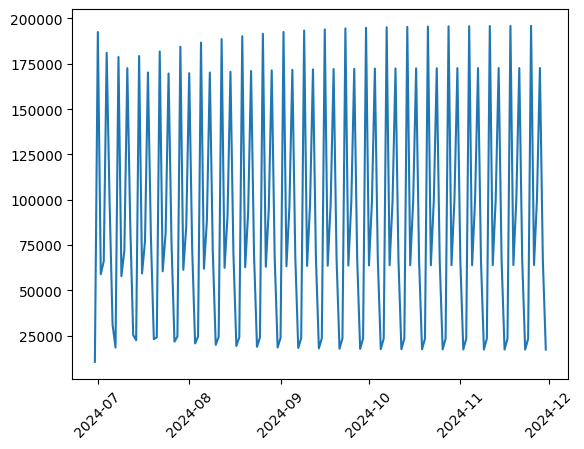

In [ ]:
# print(y_test.iloc[-1])
# print(x_test.iloc[-1])
# print(x_test.iloc[-1].values.reshape(1, -1))

input = x_test.iloc[-1].values.reshape(1, -1)
print(input)
print(input.shape)
mt_pred = []
print(df_control_rn.tail(10))
print(df_control_rn['F.Factura'].iloc[-1])
print('\n')

for i in range(154):
  pred = model_over.predict(input)
  mt_pred.append(pred[-1][0])
  var_1 = input[-1][1:]
  var_1 = np.append(var_1, pred[-1][0])
  # print(var_1)
  # print('\n')
  # print(input)
  input = np.vstack((input, var_1))
  # print('\n')
  # print(input)


start_date = df_control_rn['F.Factura'].iloc[-1]
dates = pd.date_range(start=start_date, periods=len(mt_pred))
print(dates)




df_pred = pd.DataFrame({'F.Factura': dates, 'Prediccion': mt_pred})
df_pred['Prediccion'] = scaler_control.inverse_transform(np.array(df_pred['Prediccion']).reshape(-1, 1))

plt.plot(df_pred['F.Factura'], df_pred['Prediccion'])
plt.xticks(rotation=45)
plt.show()


In [ ]:
print(df_pred['Prediccion'].describe())

print(df_pred.to_excel('/content/overfiting_result.xlsx'))

count      154.00
mean     90252.45
std      63277.70
min      10532.74
25%      24140.52
50%      67269.55
75%     170921.29
max     195951.20
Name: Prediccion, dtype: float64
None
